### Earth-Moon Circular Restricted Three Body Problem 

In [3]:
# Importing required computing packages
import numpy as np
from scipy.integrate import odeint

# Importing required plotting packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Defining the CRTBP dynamics function
def dynamics(X, t):
    
    # The spacecraft's state vector X = [position velocity] at time t
    x, y, z, xdot, ydot, zdot = X
    
    # Sun-spacecraft distance
    r1 = np.sqrt((x     + mu)**2 + y**2 + z**2)
    # Earth-spacecraft distance
    r2 = np.sqrt((x - 1.+ mu)**2 + y**2 + z**2)
    
    # CRTBP normalized equations of motion in the rotating frame (already demonstrated) 
    xddot  = x + 2.*ydot - (1.-mu)*(x + mu)/r1**3 - mu*(x -1.+mu)/r2**3

    yddot  = -2.*xdot + y*(1.-(1.-mu)/r1**3 - mu/r2**3)

    zddot  = -z*((1.-mu)/r1**3 + mu/r2**3)
    
    # Returning the state's derivitive X' = [velocity acceleration]
    return np.array([xdot, ydot, zdot, xddot, yddot, zddot])

#### Arenstorf orbit in the Earth-Moon system

\begin{align*}
x(0) &= 0.994 \\
y(0) &= 0 \\
z(0) &= 0 \\
v_x(0) &= 0 \\
v_y(0) &= -2.00158510638 \\
v_z(0) &= 0 
\end{align*}

Where $\mu_{EM} = 0.012277471$

In [15]:
# Earth-Moon fundamental constant  
mu = 0.012277471

# State initial condition
X0 = np.array([0.994, 0, 0, 0, -2.00158510638, 0])

# Time interval of the simulation
t=np.linspace(0.0,17.06521656015796,10000)

# Solving the equations of motion
X = odeint(dynamics, X0, t)

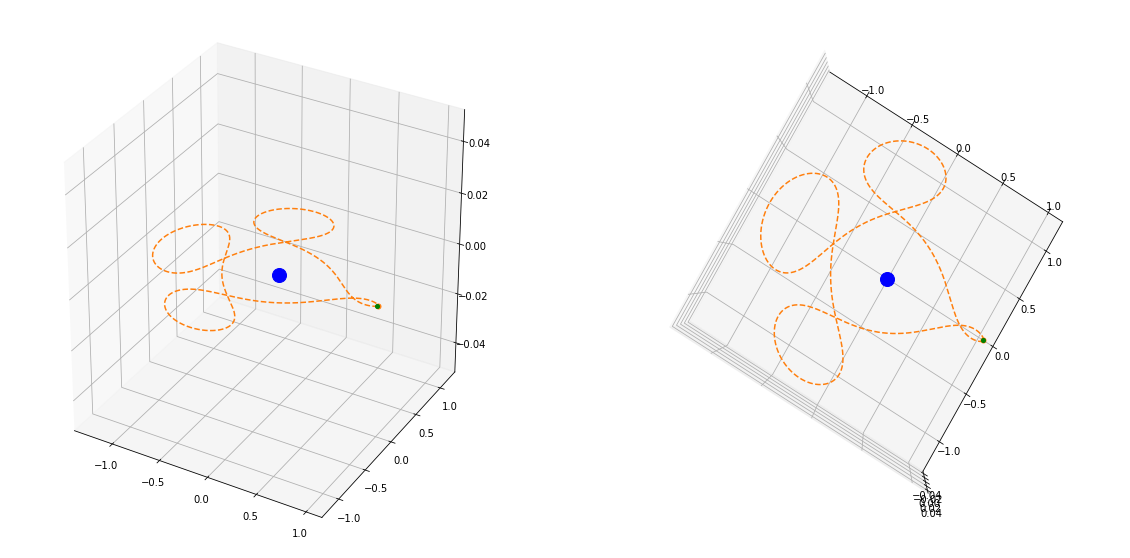

In [16]:
# Plotting the relative motion of the spacecraft
fig = plt.figure(figsize=[20, 10])

## Front view  
ax = fig.add_subplot(1, 2, 1, projection='3d')
x,  y,  z  = X.T[:3]
ax.plot(x, y, z, '--C1')
ax.plot([x[len(x)-1]], [y[len(y)-1]], [z[len(z)-1]], 'oC1', markersize=5)
# Plotting the Earth and the Moon
ax.plot([ -mu], [0], [0], 'ob', markersize=14)
ax.plot([1-mu], [0], [0], 'og', markersize=4)

## Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(x, y, z, '--C1')
ax2.plot([x[len(x)-1]], [y[len(y)-1]], [z[len(z)-1]], 'oC1', markersize=5)
# Plotting the Earth and the Moon
ax2.plot([ -mu], [0], [0], 'ob', markersize=14)
ax2.plot([1-mu], [0], [0], 'og', markersize=4)
ax2.view_init(90)


In [17]:
def rot_to_inert(X, t):
    X_r =[]
    Y_r =[]
    Z_r =[]
    n= len(t)
    j=0
    for i in t:    
        x_r = np.cos(i)*X[j,0] - np.sin(i)*X[j,1]
        y_r = np.sin(i)*X[j,0] + np.cos(i)*X[j,1]
        z_r = X[j,2]
        X_r.append(x_r)
        Y_r.append(y_r)
        Z_r.append(z_r)
        j+=1
    x, y, z = np.array(X_r), np.array(Y_r), np.array(Z_r)
    return x, y, z

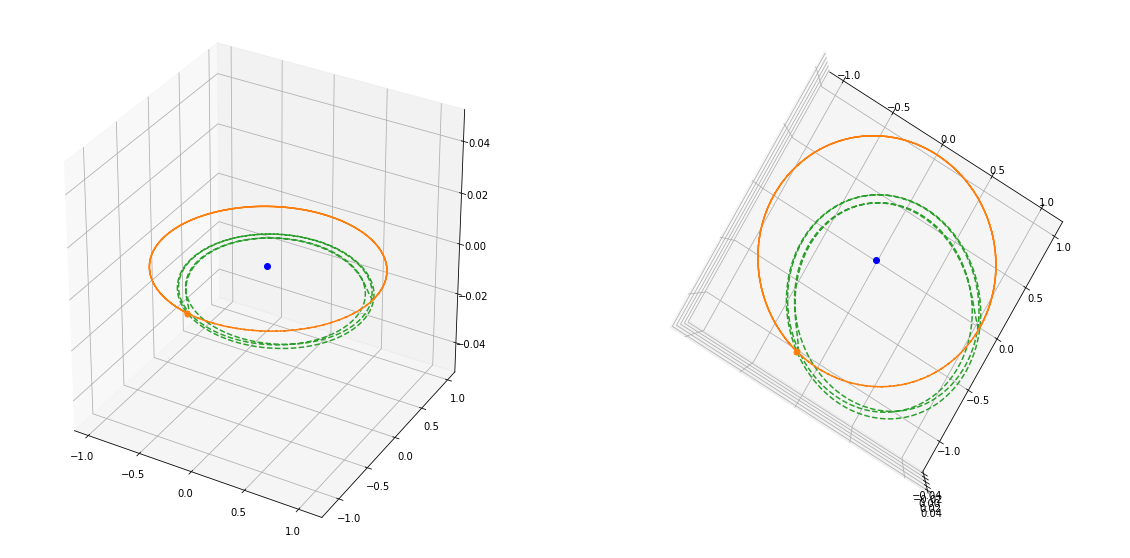

In [18]:
# Plotting the relative motion of the spacecraft
fig = plt.figure(figsize=[20, 10])

xi, yi, zi = rot_to_inert(X, t)
xe, ye, ze = (1-mu)*np.cos(t), (1-mu)*np.sin(t), 0

## Front view  
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot(xi, yi, zi, '--C2')
ax.plot([xi[len(xi)-1]], [yi[len(yi)-1]], [zi[len(zi)-1]], 'oC1', markersize=5)
# Plotting the Earth and the Moon
ax.plot(xe, ye, ze, '--C1')
ax.plot([xe[len(xe)-1]], [ye[len(ye)-1]], [0], 'oC1', markersize=5)
ax.plot([ -mu], [0], [0], 'ob', markersize=6)

## Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(xi, yi, zi, '--C2')
ax2.plot([xi[len(xi)-1]], [yi[len(yi)-1]], [zi[len(zi)-1]], 'oC1', markersize=5)
# Plotting the Earth and the Moon
ax2.plot(xe, ye, ze, '--C1')
ax2.plot([xe[len(xe)-1]], [ye[len(ye)-1]], [0], 'oC1', markersize=5)
ax2.plot([ -mu], [0], [0], 'ob', markersize=6)
ax2.view_init(90)


#### Another orbit of the Earth-Moon system

In [20]:
# Earth-Moon fundamental constant 
mu = 0.012277471

# State initial condition
X0 = np.array([1.2, 0, 0, 0, -1.049357510, 0])

# Time interval of the simulation
t=np.linspace(0.0,6.18,10000)

# Solving the equations of motion
X = odeint(dynamics, X0, t)

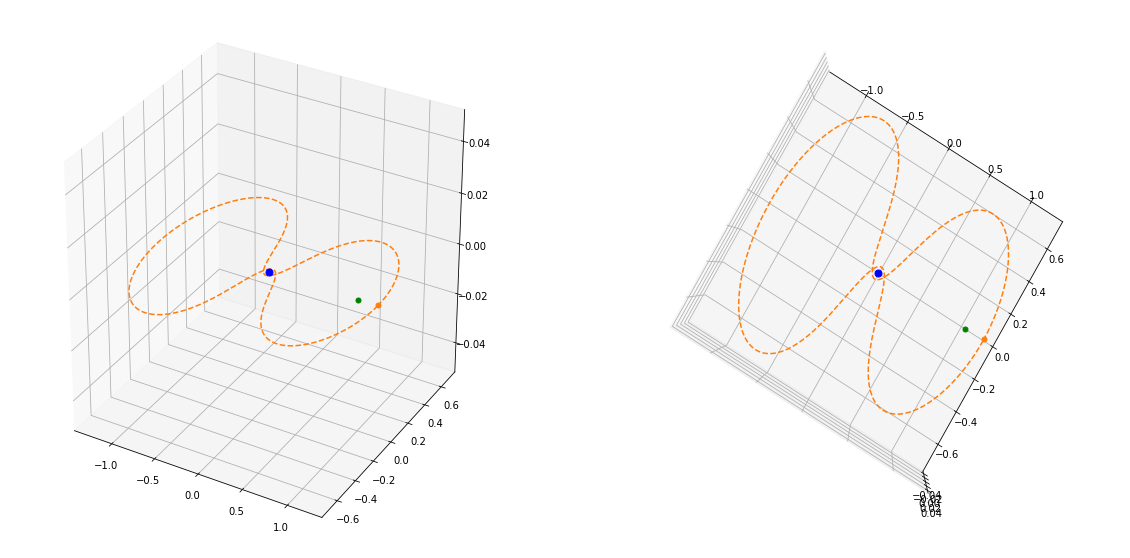

In [23]:
# Plotting the relative motion of the spacecraft
fig = plt.figure(figsize=[20, 10])

## Front view  
ax = fig.add_subplot(1, 2, 1, projection='3d')
x,  y,  z  = X.T[:3]
ax.plot(x, y, z, '--C1')
ax.plot([x[len(x)-1]], [y[len(y)-1]], [z[len(z)-1]], 'oC1', markersize=5)
# Plotting the Earth and the Moon
ax.plot([ -mu], [0], [0], 'ob', markersize=7)
ax.plot([1-mu], [0], [0], 'og', markersize=5)

## Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(x, y, z, '--C1')
ax2.plot([x[len(x)-1]], [y[len(y)-1]], [z[len(z)-1]], 'oC1', markersize=5)
# Plotting the Earth and the Moon
ax2.plot([ -mu], [0], [0], 'ob', markersize=7)
ax2.plot([1-mu], [0], [0], 'og', markersize=5)
ax2.view_init(90)


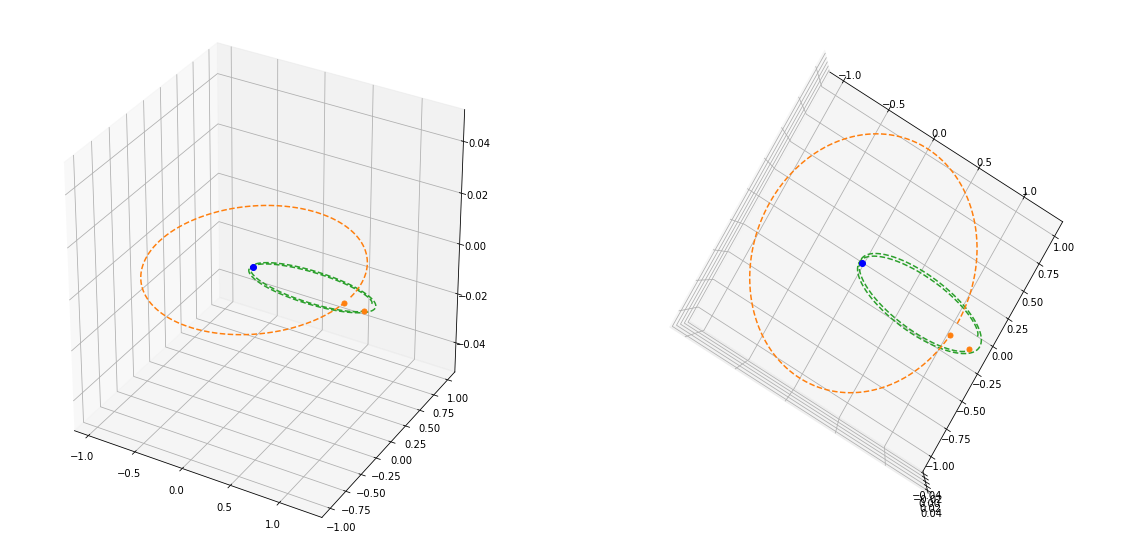

In [14]:
# Plotting the relative motion of the spacecraft
fig = plt.figure(figsize=[20, 10])

xi, yi, zi = rot_to_inert(X, t)
xe, ye, ze = (1-mu)*np.cos(t), (1-mu)*np.sin(t), 0

## Front view  
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot(xi, yi, zi, '--C2')
ax.plot([xi[len(xi)-1]], [yi[len(yi)-1]], [zi[len(zi)-1]], 'oC1', markersize=5)
# Plotting the Earth and the Moon
ax.plot(xe, ye, ze, '--C1')
ax.plot([xe[len(xe)-1]], [ye[len(ye)-1]], [0], 'oC1', markersize=5)
ax.plot([ -mu], [0], [0], 'ob', markersize=6)

## Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(xi, yi, zi, '--C2')
ax2.plot([xi[len(xi)-1]], [yi[len(yi)-1]], [zi[len(zi)-1]], 'oC1', markersize=5)
# Plotting the Earth and the Moon
ax2.plot(xe, ye, ze, '--C1')
ax2.plot([xe[len(xe)-1]], [ye[len(ye)-1]], [0], 'oC1', markersize=5)
ax2.plot([ -mu], [0], [0], 'ob', markersize=6)
ax2.view_init(90)
